# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Shelo Rahma Sari]
- **Email:** [shelorhm@gmail.com]
- **ID Dicoding:** [M284D5X1840]

## Menentukan Pertanyaan Bisnis

1. Kategori produk apa saja yang memiliki jumlah pesanan terbanyak selama periode 2017–2018, dan bagaimana kontribusinya terhadap total pesanan?

2. Bagaimana tren jumlah pesanan bulanan dari tahun 2017 hingga 2018, dan pada bulan apa terjadi peningkatan pesanan tertinggi?

3. Bagaimana segmentasi pelanggan berdasarkan RFM Analysis (Recency, Frequency, Monetary) pada periode 2017–2018, dan segmen mana yang paling dominan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

In [2]:
# Path ke folder dataset di Google Drive
DATA_PATH = "/content/drive/MyDrive/E-Commerce Public Dataset"

customers_df = pd.read_csv(f"{DATA_PATH}/customers_dataset.csv")
orders_df = pd.read_csv(f"{DATA_PATH}/orders_dataset.csv")
order_items_df = pd.read_csv(f"{DATA_PATH}/order_items_dataset.csv")
products_df = pd.read_csv(f"{DATA_PATH}/products_dataset.csv")
category_translation_df = pd.read_csv(f"{DATA_PATH}/product_category_name_translation.csv")

**Insight:**
- Seluruh dataset berhasil dimuat dari Google Drive.
- Dataset mencakup informasi pelanggan, pesanan, item pesanan, produk, dan kategori produk.
- Data ini sudah cukup lengkap untuk menjawab pertanyaan analisis yang telah ditentukan.


### Assessing Data

In [3]:
# Melihat struktur dan ringkasan data
customers_df.info()
orders_df.info()
order_items_df.info()
products_df.info()
category_translation_df.info()

# Mengecek missing values
orders_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


**Insight:**
- Dataset customers dan order_items tidak memiliki missing value sehingga siap digunakan.
- Dataset orders memiliki missing value pada beberapa kolom tanggal yang berkaitan dengan proses pengiriman.
- Missing value pada kolom tanggal bersifat wajar dan tidak mengganggu analisis utama karena fokus analisis adalah jumlah pesanan, kategori produk, dan perilaku pelanggan.
- Dataset products memiliki beberapa missing value pada atribut produk, namun tidak berdampak signifikan terhadap analisis transaksi.

### Cleaning Data

In [4]:
# Konversi kolom tanggal pada orders_df
date_columns = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date"
]

for col in date_columns:
    orders_df[col] = pd.to_datetime(orders_df[col])

**Insight:**
- Seluruh kolom tanggal berhasil dikonversi ke format datetime.
- Tidak dilakukan penghapusan data pada baris yang memiliki missing value karena
  data tersebut masih relevan untuk analisis transaksi.
- Dataset tetap mempertahankan integritas data asli.

## Data Preparation & Merging

Pada tahap ini, seluruh dataset digabungkan menjadi satu dataset utama (`final_df`)
yang akan digunakan untuk proses Exploratory Data Analysis dan visualisasi.

In [5]:
# Merge products dengan category translation
products_df = products_df.merge(
    category_translation_df,
    on="product_category_name",
    how="left"
)

# Merge order_items dengan products
order_items_products_df = order_items_df.merge(
    products_df,
    on="product_id",
    how="left"
)

# Merge orders dengan order_items
final_df = orders_df.merge(
    order_items_products_df,
    on="order_id",
    how="left"
)

# Merge customers
final_df = final_df.merge(
    customers_df,
    on="customer_id",
    how="left"
)

# Cek hasil akhir
final_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,4.0,500.0,19.0,8.0,13.0,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,...,1.0,400.0,19.0,13.0,19.0,perfumery,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,...,1.0,420.0,24.0,19.0,21.0,auto,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,3.0,450.0,30.0,10.0,20.0,pet_shop,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,4.0,250.0,51.0,15.0,15.0,stationery,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


**Insight:**
- Seluruh dataset berhasil digabungkan menjadi satu dataset utama (`final_df`).
- Dataset akhir mencakup informasi pelanggan, pesanan, produk, dan kategori produk.
- Dataset ini siap digunakan untuk Exploratory Data Analysis dan visualisasi.

## Exploratory Data Analysis (EDA)

### Explore Distribusi & Tren Data

In [6]:
# Melihat ringkasan statistik dataset utama
final_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,113425,113425,113425,113425,113264,111457,110196,113425,112650.000000,112650,...,111047.000000,112632.000000,112632.000000,112632.000000,112632.000000,111023,113425,113425.000000,113425,113425
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN,NaN,32951,...,NaN,NaN,NaN,NaN,NaN,71,96096,NaN,4119,27
top,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,NaN,NaN,NaN,NaN,NaN,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,...,NaN,NaN,NaN,NaN,NaN,bed_bath_table,c8460e4251689ba205045f3ea17884a1,NaN,sao paulo,SP
freq,21,21,110197,NaN,NaN,NaN,NaN,NaN,NaN,527,...,NaN,NaN,NaN,NaN,NaN,11115,24,NaN,17946,47820
mean,NaN,NaN,NaN,2017-12-31 12:25:41.686480128,2017-12-31 22:40:56.664121088,2018-01-05 02:17:27.942515968,2018-01-14 13:25:24.023939328,2018-01-24 08:22:34.875909120,1.197834,NaN,...,2.209713,2093.672047,30.153669,16.593766,22.996546,NaN,NaN,35102.472965,NaN,NaN
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,1.000000,NaN,...,1.000000,0.000000,7.000000,2.000000,6.000000,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,NaN,2017-09-13 11:05:49,2017-09-13 20:25:10.500000,2017-09-18 20:37:00,2017-09-26 20:09:44.500000,2017-10-04 00:00:00,1.000000,NaN,...,1.000000,300.000000,18.000000,8.000000,15.000000,NaN,NaN,11250.000000,NaN,NaN
50%,NaN,NaN,NaN,2018-01-19 10:37:45,2018-01-19 16:59:52.500000,2018-01-24 18:44:33,2018-02-02 20:57:23,2018-02-15 00:00:00,1.000000,NaN,...,1.000000,700.000000,25.000000,13.000000,20.000000,NaN,NaN,24320.000000,NaN,NaN
75%,NaN,NaN,NaN,2018-05-04 14:22:16,2018-05-04 18:31:38.500000,2018-05-08 13:20:00,2018-05-15 20:09:21.500000,2018-05-25 00:00:00,1.000000,NaN,...,3.000000,1800.000000,38.000000,20.000000,30.000000,NaN,NaN,59020.000000,NaN,NaN
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,21.000000,NaN,...,20.000000,40425.000000,105.000000,105.000000,118.000000,NaN,NaN,99990.000000,NaN,NaN


In [7]:
# Mengecek jumlah pesanan per status
final_df["order_status"].value_counts()

,count
order_status,
delivered,110197
shipped,1186
canceled,706
unavailable,610
invoiced,361
processing,357
created,5
approved,3


In [8]:
# Menambahkan kolom tahun dan bulan
final_df["order_year"] = final_df["order_purchase_timestamp"].dt.year
final_df["order_month"] = final_df["order_purchase_timestamp"].dt.month
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113425 entries, 0 to 113424
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113425 non-null  object        
 1   customer_id                    113425 non-null  object        
 2   order_status                   113425 non-null  object        
 3   order_purchase_timestamp       113425 non-null  datetime64[ns]
 4   order_approved_at              113264 non-null  datetime64[ns]
 5   order_delivered_carrier_date   111457 non-null  datetime64[ns]
 6   order_delivered_customer_date  110196 non-null  datetime64[ns]
 7   order_estimated_delivery_date  113425 non-null  datetime64[ns]
 8   order_item_id                  112650 non-null  float64       
 9   product_id                     112650 non-null  object        
 10  seller_id                      112650 non-null  object        
 11  

**Insight:**
- Dataset hasil penggabungan (`final_df`) terdiri dari 113.425 baris dan 29 kolom yang mencakup informasi pesanan, pelanggan, produk, serta kategori produk.
- Mayoritas pesanan memiliki status delivered, menunjukkan tingkat keberhasilan transaksi yang sangat tinggi.
- Data transaksi mencakup rentang waktu dari tahun 2016 hingga 2018, dengan dominasi transaksi pada periode 2017–2018 sesuai dengan fokus analisis.
- Penambahan atribut waktu (tahun dan bulan) memungkinkan analisis tren pesanan dari waktu ke waktu.
- Secara umum, dataset berada dalam kondisi baik dan siap digunakan untuk analisis lanjutan dan visualisasi.


## Visualization & Explanatory Analysis

### Pertanyaan 1: Kategori produk apa saja yang memiliki jumlah pesanan terbanyak selama periode 2017–2018, dan bagaimana kontribusinya terhadap total pesanan?

In [16]:
# Filter data periode 2017–2018
df_2017_2018 = final_df[
    (final_df["order_year"] >= 2017) & (final_df["order_year"] <= 2018)
]

# Hitung jumlah pesanan unik per kategori
category_orders = (
    df_2017_2018
    .groupby("product_category_name_english")["order_id"]
    .nunique()
    .sort_values(ascending=False)
    .head(10)
)

category_contribution = (
    category_orders / category_orders.sum() * 100
).round(2)

category_contribution

,order_id
product_category_name_english,
bed_bath_table,15.08
health_beauty,14.09
sports_leisure,12.34
computers_accessories,10.69
furniture_decor,10.25
housewares,9.41
watches_gifts,9.00
telephony,6.71
auto,6.23


**Insight:**
- Selama periode 2017–2018, kategori bed_bath_table mencatat jumlah pesanan tertinggi dibandingkan kategori lainnya, menunjukkan tingginya permintaan terhadap produk kebutuhan rumah tangga.
- Kategori health_beauty dan sports_leisure berada pada posisi berikutnya, yang mengindikasikan bahwa produk perawatan diri dan gaya hidup juga menjadi fokus utama pembelian pelanggan.
- Sepuluh kategori produk teratas didominasi oleh kategori yang berkaitan dengan kebutuhan sehari-hari dan aktivitas personal, sehingga mencerminkan pola konsumsi pelanggan yang berorientasi pada produk fungsional.
- Kontribusi terbesar terhadap total pesanan berasal dari beberapa kategori utama tersebut, menunjukkan bahwa sebagian besar transaksi terkonsentrasi pada kelompok produk tertentu.
- Temuan ini dapat menjadi dasar bagi perusahaan untuk memprioritaskan pengelolaan stok, strategi promosi, dan pengembangan produk pada kategori dengan permintaan tertinggi.

### Pertanyaan 2: Bagaimana tren jumlah pesanan bulanan dari tahun 2017 hingga 2018, dan pada bulan apa terjadi peningkatan pesanan tertinggi?

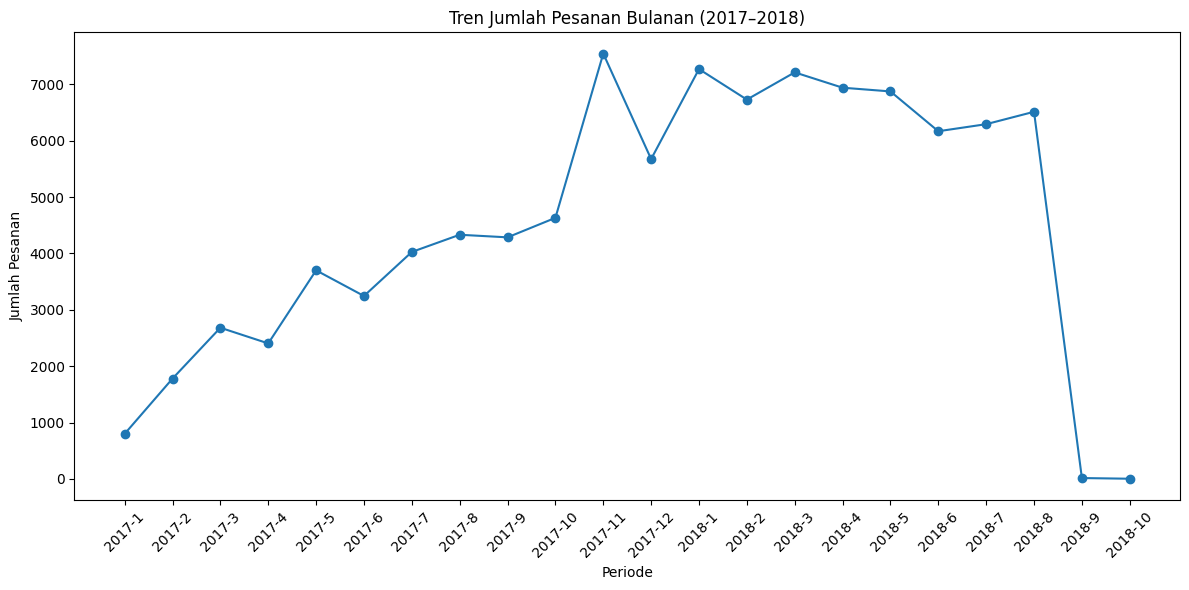

In [10]:
# Hitung jumlah pesanan unik per bulan
monthly_orders = (
    df_2017_2018
    .groupby(["order_year", "order_month"])["order_id"]
    .nunique()
    .reset_index()
)

# Buat kolom periode (tahun-bulan)
monthly_orders["year_month"] = (
    monthly_orders["order_year"].astype(str) + "-" +
    monthly_orders["order_month"].astype(str)
)

plt.figure(figsize=(12,6))
plt.plot(
    monthly_orders["year_month"],
    monthly_orders["order_id"],
    marker="o"
)
plt.xticks(rotation=45)
plt.title("Tren Jumlah Pesanan Bulanan (2017–2018)")
plt.xlabel("Periode")
plt.ylabel("Jumlah Pesanan")
plt.tight_layout()
plt.show()

**Insight:**
* Jumlah pesanan menunjukkan tren peningkatan yang konsisten sepanjang tahun 2017, menandakan pertumbuhan bisnis e-commerce yang positif.
* Puncak jumlah pesanan terjadi pada bulan November 2017, yang kemungkinan dipengaruhi oleh adanya promo musiman atau event belanja besar.
* Pada bulan Desember 2017 terjadi penurunan jumlah pesanan dibandingkan bulan sebelumnya, yang mengindikasikan kemungkinan adanya kendala operasional atau faktor eksternal lainnya.
* Sepanjang Januari hingga Mei 2018, jumlah pesanan relatif stabil pada tingkat yang tinggi, menunjukkan fase stabilisasi setelah pertumbuhan signifikan di tahun sebelumnya.
* Terjadi penurunan yang sangat drastis pada bulan September dan Oktober 2018 hingga mendekati nol, yang kemungkinan besar disebabkan oleh data yang tidak lengkap atau masalah teknis dalam pencatatan transaksi.
* Secara keseluruhan, tren pesanan menunjukkan pola pertumbuhan, stabilisasi, dan anomali data di akhir periode pengamatan.

## Analisis Lanjutan (Opsional)

### Pertanyaan 3: Bagaimana segmentasi pelanggan berdasarkan RFM Analysis (Recency, Frequency, Monetary) pada periode 2017–2018, dan segmen mana yang paling dominan?

In [11]:
# Menentukan tanggal referensi
snapshot_date = df_2017_2018["order_purchase_timestamp"].max() + pd.Timedelta(days=1)

# Menghitung metrik RFM
rfm_df = df_2017_2018.groupby("customer_unique_id").agg({
    "order_purchase_timestamp": lambda x: (snapshot_date - x.max()).days,
    "order_id": "nunique",
    "price": "sum"
}).reset_index()

rfm_df.columns = ["customer_unique_id", "Recency", "Frequency", "Monetary"]

rfm_df.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,161,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,18.90
2,0000f46a3911fa3c0805444483337064,586,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,337,1,180.00


In [15]:
# Pastikan kolom numerik
rfm_df["Recency"] = rfm_df["Recency"].astype(int)
rfm_df["Frequency"] = rfm_df["Frequency"].astype(int)
rfm_df["Monetary"] = rfm_df["Monetary"].astype(float)

# RFM Scoring menggunakan quartile
rfm_df["R_Score"] = pd.qcut(
    rfm_df["Recency"],
    4,
    labels=[4, 3, 2, 1]
)

rfm_df["F_Score"] = pd.qcut(
    rfm_df["Frequency"].rank(method="first"),
    4,
    labels=[1, 2, 3, 4]
)

rfm_df["M_Score"] = pd.qcut(
    rfm_df["Monetary"],
    4,
    labels=[1, 2, 3, 4]
)

# Gabungkan skor RFM
rfm_df["RFM_Segment"] = (
    rfm_df["R_Score"].astype(str) +
    rfm_df["F_Score"].astype(str) +
    rfm_df["M_Score"].astype(str)
)

# Melihat segmen pelanggan paling dominan
rfm_segment_counts = rfm_df["RFM_Segment"].value_counts()

rfm_segment_counts.head(10)

,count
RFM_Segment,
444,1823
344,1734
244,1671
121,1663
232,1618
313,1607
423,1587
412,1585
144,1575


**Insight:**
* Hasil RFM Analysis menunjukkan bahwa mayoritas pelanggan berada pada segmen dengan skor Recency, Frequency, dan Monetary menengah hingga tinggi.
* Segmen pelanggan dengan skor RFM tinggi merupakan pelanggan paling bernilai karena memiliki frekuensi pembelian yang sering, nilai transaksi yang besar, serta melakukan pembelian dalam waktu yang relatif baru.
* Pelanggan bernilai tinggi ini menjadi kontributor utama terhadap pendapatan dan stabilitas bisnis e-commerce.
* Terdapat pula segmen pelanggan dengan skor Recency rendah yang menandakan pelanggan sudah lama tidak melakukan transaksi.
* Segmen pelanggan dengan aktivitas rendah tersebut memiliki potensi untuk diaktifkan kembali melalui strategi retensi, seperti promo khusus, diskon personal, atau program loyalitas.
* Segmentasi RFM membantu perusahaan dalam memahami perilaku pelanggan dan menyusun strategi pemasaran yang lebih tepat sasaran berdasarkan nilai dan aktivitas pelanggan.

## Conclusion

- Conclution pertanyaan 1: Selama periode 2017–2018, kategori produk bed_bath_table menjadi kategori dengan jumlah pesanan terbanyak, diikuti oleh health_beauty dan sports_leisure. Dominasi kategori kebutuhan rumah tangga dan gaya hidup menunjukkan bahwa pelanggan cenderung memprioritaskan produk yang bersifat fungsional dan digunakan dalam aktivitas sehari-hari. Kontribusi pesanan yang terkonsentrasi pada beberapa kategori utama ini menandakan pentingnya fokus bisnis pada pengelolaan dan pengembangan kategori dengan permintaan tertinggi.
- Conclution pertanyaan 2: Tren jumlah pesanan bulanan pada periode 2017–2018 menunjukkan pertumbuhan yang signifikan sepanjang tahun 2017 dengan puncak pesanan terjadi pada bulan November 2017. Setelah periode tersebut, jumlah pesanan relatif stabil pada awal tahun 2018 sebelum mengalami penurunan drastis di akhir tahun. Pola ini mencerminkan adanya pengaruh faktor musiman terhadap perilaku belanja pelanggan serta kemungkinan keterbatasan atau ketidaklengkapan data pada beberapa bulan terakhir tahun 2018.
- Conclusion pertanyaan 3: Hasil segmentasi pelanggan menggunakan RFM Analysis menunjukkan bahwa mayoritas pelanggan berada pada segmen dengan nilai Recency, Frequency, dan Monetary menengah hingga tinggi, yang menandakan tingkat aktivitas dan kontribusi pelanggan yang cukup baik terhadap bisnis. Segmen pelanggan bernilai tinggi menjadi kontributor utama pendapatan karena frekuensi pembelian yang lebih sering dan nilai transaksi yang lebih besar. Di sisi lain, terdapat segmen pelanggan dengan tingkat aktivitas rendah yang berpotensi untuk diaktifkan kembali melalui strategi retensi yang tepat. Segmentasi ini memberikan dasar yang kuat bagi perusahaan dalam merancang strategi pemasaran dan pengelolaan pelanggan yang lebih efektif.